# Part 1: Neural Network

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import pylab as plt

Using TensorFlow backend.


#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [2]:
batch_size = 128
num_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



#print(x_train[0].reshape(28,28))

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


(60000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


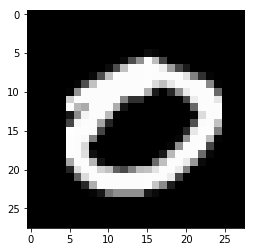

In [3]:
test_reshape=x_train[114].reshape(28, 28)
print(y_train.shape)
print(y_train[114])


plt.imshow(test_reshape, cmap='gray')
plt.show()

### Visualize Data

Label: []


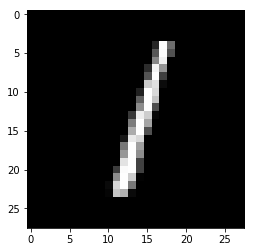

In [4]:
print("Label:",y_test[2:2])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [5]:
first_layer_size = 32
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(784,)))

model.add(Dense(32, activation='tanh'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### Training and Testing

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.3954 - acc: 0.8945 - val_loss: 0.2447 - val_acc: 0.9267
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1919 - acc: 0.9442 - val_loss: 0.1853 - val_acc: 0.9422
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1436 - acc: 0.9582 - val_loss: 0.1332 - val_acc: 0.9594
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1138 - acc: 0.9668 - val_loss: 0.1189 - val_acc: 0.9637
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0937 - acc: 0.9723 - val_loss: 0.1080 - val_acc: 0.9664
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0797 - acc: 0.9762 - val_loss: 0.1048 - val_acc: 0.9672
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0684 - acc: 0.9798 - val_loss: 0.0955 - val_a

### Visualize the weights

Shape of First Layer (784, 64)
Visualization of First Layer


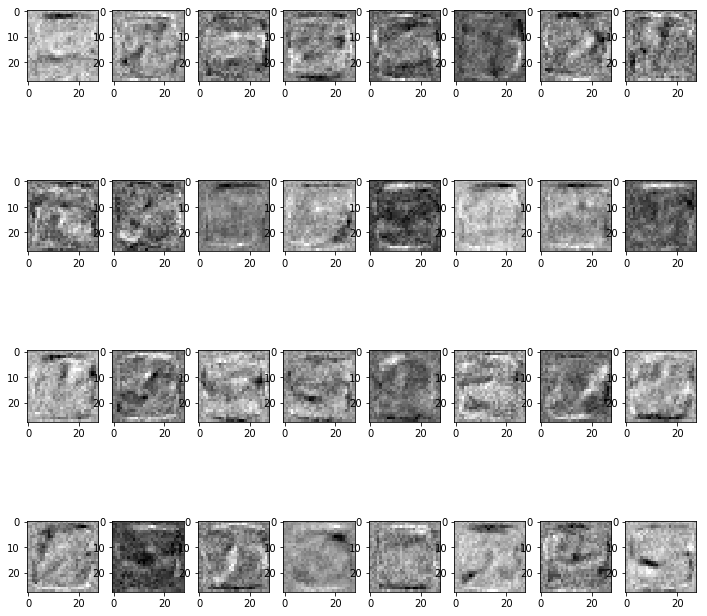

In [7]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

(1, 784)


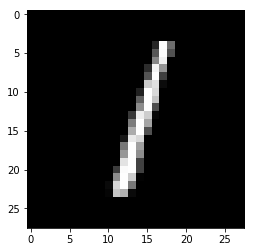

Prediction
 [5.6643145e-08 9.9983215e-01 4.3465880e-05 8.4731601e-06 1.7918703e-05
 3.9456086e-06 4.6625432e-06 2.4155564e-05 6.2444968e-05 2.7890987e-06]
Thresholded output
 [0 1 0 0 0 0 0 0 0 0]


In [8]:
print(x_test[2:3].shape)
#test x_test[2:3] is equal x_test[2]
dhams_x=x_test[2:3]
#print(dhams_x)

plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()
prediction = model.predict(dhams_x)
prediction = prediction[0]
print('Prediction\n',prediction)
print('Thresholded output\n',(prediction>0.5)*1)

### Ground truth

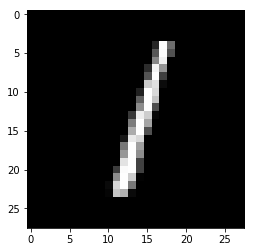

In [10]:
plt.imshow(dhams_x.reshape(28,28),cmap='gray')
plt.show()

### User Input

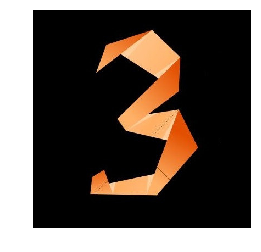

In [11]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

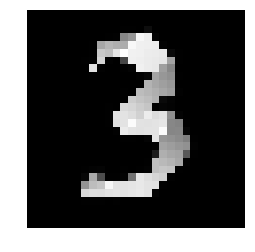

In [12]:
# Load image as grayscale
image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [13]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [8.3143803e-08 1.6428301e-07 1.3806660e-06 9.9998307e-01 1.3140470e-07
 3.6016777e-06 3.0459151e-09 8.5949310e-08 8.2908809e-06 3.1011234e-06]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [14]:
# serialize model to JSON
model_json = model.to_json()
print(model_json)
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 64, "activation": "tanh", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "tanh", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "

### Loading a model

In [15]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [16]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0417 - acc: 0.9876 - val_loss: 0.0913 - val_acc: 0.9722
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0365 - acc: 0.9893 - val_loss: 0.0856 - val_acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0327 - acc: 0.9906 - val_loss: 0.0900 - val_acc: 0.9746
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0294 - acc: 0.9915 - val_loss: 0.0923 - val_acc: 0.9726
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0261 - acc: 0.9927 - val_loss: 0.0848 - val_acc: 0.9745
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0230 - acc: 0.9936 - val_loss: 0.1003 - val_acc: 0.9717
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0212 - acc: 0.9943 - val_loss: 0.0868 - val_acc

### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid

In [17]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/step - loss: 2.0621 - acc: 0.3595 - val_loss: 1.8081 - val_acc: 0.4717
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 1.5845 - acc: 0.5476 - val_loss: 1.3921 - val_acc: 0.6463
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 1

### Relu

In [18]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 75us/step - loss: 1.0872 - acc: 0.6405 - val_loss: 0.5503 - val_acc: 0.8439
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.4622 - acc: 0.8690 - val_loss: 0.3980 - val_acc: 0.8833
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

### What are your findings?

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes i.e. 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 1.8794 - acc: 0.5267 - val_loss: 1.3719 - val_acc: 0.7497
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.9922 - acc: 0.8111 - val_loss: 0.7003 - val_acc: 0.8574
Epoch 3/10
60000/60000 [==============================] - 5s 75us/step - loss: 0

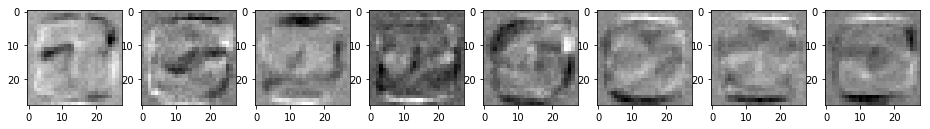

In [19]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes i.e. 128

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.8772 - acc: 0.8112 - val_loss: 0.3577 - val_acc: 0.9092
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2895 - acc: 0.9207 - val_loss: 0.2359 - val_acc: 0.9324
Epoch 3/10
60000/60000 [==============================] - 4s 74us/step - los

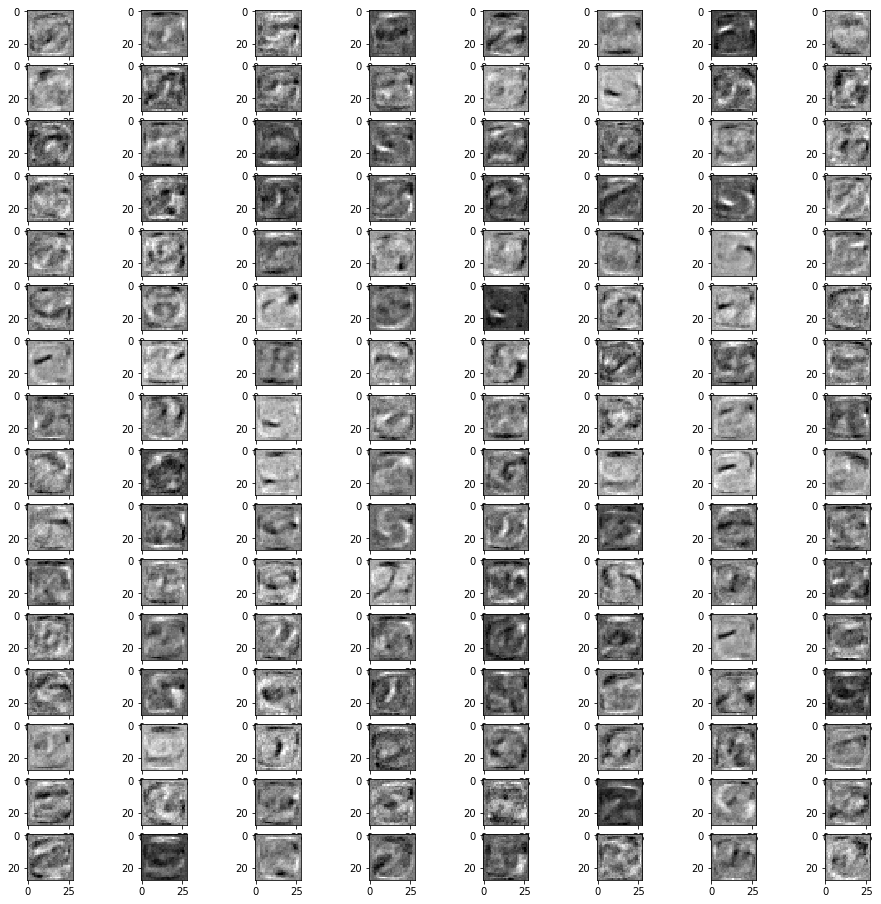

In [20]:
first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Lower number of Layers i.e. 1

In [21]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 1.3744 - acc: 0.5597 - val_loss: 0.9925 - val_acc: 0.7031
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.9018 - acc: 0.7383 - val_loss: 0.8012 - val_acc: 0.7850
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.7568 - acc: 0.7921 - val_loss: 0.6935 - val_acc: 0.8144
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - lo

### Higher number of Layers i.e. 4

In [22]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 10)                50        
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 1.7421 - acc: 0.3591 - val_loss: 1.4387 - val_acc: 0.4865
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.2675

### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science